# Assignment 2: Convolutional Autoencoders

Britt Schmitz  - i6235053 <br>
Tabea Heusel - i6323791

## 0 Setup

### 0.1 Imports

In [51]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

### 0.2 Loading Dataset

In [18]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
X = np.append(x_train, x_test, axis=0)
y = np.append(y_train, y_test, axis=0)

## 1 Autoencoder Network Implementation

### 1.1 Train, Validation, and Test 

In [34]:
# normalize
X = X / 255

# create train, validation, and test splits
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.2, random_state=3)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=3)

### 1.2 Autoencoder Network

In [58]:
def create_cae():
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Conv2D(8, 3, 1, "same", activation="relu", input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.MaxPool2D(2, padding="same"))
    model.add(tf.keras.layers.Conv2D(12, 3, 1, "same", activation="relu"))
    model.add(tf.keras.layers.MaxPool2D(2, padding="same"))
    model.add(tf.keras.layers.Conv2D(16, 3, 1, "same", activation="relu"))
    model.add(tf.keras.layers.UpSampling2D(2))
    model.add(tf.keras.layers.Conv2D(12, 3, 1, "same", activation="relu"))
    model.add(tf.keras.layers.UpSampling2D(2))
    model.add(tf.keras.layers.Conv2D(3, 3, 1, "same", activation="relu"))
    
    return model

Epoch 1/50
1500/1500 [==============================] - 64s 42ms/step - loss: 0.6192 - accuracy: 0.3967 - val_loss: 0.5982 - val_accuracy: 0.4136
Epoch 2/50
1500/1500 [==============================] - 63s 42ms/step - loss: 0.5959 - accuracy: 0.4123 - val_loss: 0.5922 - val_accuracy: 0.4175
Epoch 3/50
1500/1500 [==============================] - 65s 43ms/step - loss: 0.5931 - accuracy: 0.4141 - val_loss: 0.5893 - val_accuracy: 0.4189
Epoch 4/50
1500/1500 [==============================] - 63s 42ms/step - loss: 0.5898 - accuracy: 0.4256 - val_loss: 0.5871 - val_accuracy: 0.4561
Epoch 5/50
1500/1500 [==============================] - 64s 43ms/step - loss: 0.5850 - accuracy: 0.4796 - val_loss: 0.5816 - val_accuracy: 0.5383
Epoch 6/50
1500/1500 [==============================] - 65s 43ms/step - loss: 0.5807 - accuracy: 0.5707 - val_loss: 0.5791 - val_accuracy: 0.5910
Epoch 7/50
1500/1500 [==============================] - 64s 43ms/step - loss: 0.5883 - accuracy: 0.5193 - val_loss: 0.5889 -

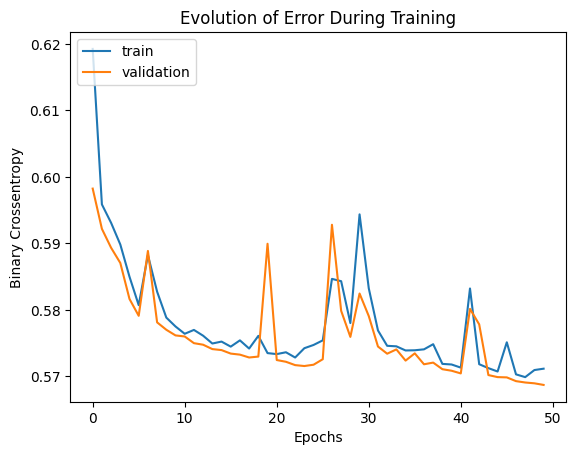

In [70]:
network = create_cae()
network.compile(optimizer="sgd", loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
history = network.fit(X_train, X_train, epochs=50, validation_data=(X_val, X_val))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy')
plt.title('Evolution of Error During Training')
plt.legend(['train', 'validation'], loc='upper left')

In [75]:
results = network.evaluate(X_test, X_test)
print(f"Test accuracy: {results[1]} \nTest error : {results[0]}")

188/188 [==============================] - 2s 11ms/step - loss: 0.5682 - accuracy: 0.6564
Test accuracy: 0.6563758254051208 
Test error : 0.568173885345459


188/188 [==============================] - 1s 7ms/step


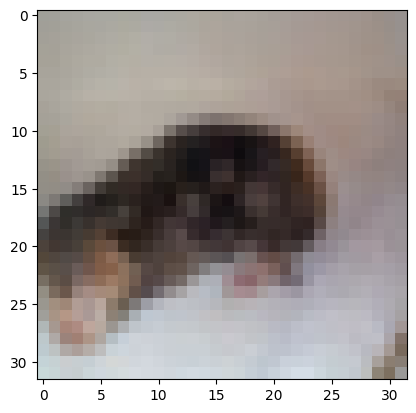

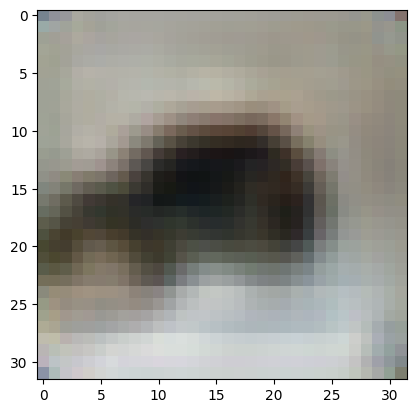

In [74]:
predictions = network.predict(X_test)

plt.imshow(X_test[0])
plt.show()
plt.imshow(predictions[0])
plt.show()

## 2 Latent Space Representations

### 2.1 Latent Space Size of Previous Network

In [78]:
def compute_latent_space_size(w, k, p, s, c):
    num = w - k + 2 * p
    frac = num / s
    square = (frac + 1) ** 2
    result = square * c
    
    return result

In [79]:
w = 8
k = 3
p = 1
s = 1
c = 16

print(compute_latent_space_size(w, k, p, s, c))

1024.0


### 2.2 Correlation Between Latent Space Representation and Error